In [1]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [79]:
# Read in data
df_2020 = pd.read_csv('../data/img_scout_dfs/2020/INC_coreg_skysat_scout_2020.csv')
df_2021 = pd.read_csv('../data/img_scout_dfs/2021/INC_skysat_scout_2021.csv')
df_2022 = pd.read_csv('../data/img_scout_dfs/2022/INC_skysat_scout_2022.csv')

dfs = [df_2020,df_2021, df_2022]

In [80]:
# Add VIs
def add_vis(df):
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    #df['sr']= df['nir']/df['red']
    #df['msr']= ((df['nir']/df['red'])-1)/(np.sqrt((df['nir']/df['red'])+1))
    #df['dvi']= df['nir']-df['red']
    #df['nirv']= df['ndvi']*df['nir']
    df['gri']=df['green']/df['red']
    #df['tvi']=0.5*(120*(df['nir']-df['green'])-200*(df['red']-df['green']))
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    
    return df

In [63]:
# for d in dfs:
#     add_vis(d)
#     d['disease_class'] = 'low'
#     d.loc[d['DM_severity'] > 10, 'disease_class'] = 'high'

In [81]:
for d in dfs:
    add_vis(d)
    d['disease_class'] = 'low'
    d.loc[d['DM_inc'] > 25, 'disease_class'] = 'high'

In [82]:
master_df = pd.concat(dfs)

In [83]:
master_df.columns

Index(['acquired', 'plot', 'blue', 'green', 'red', 'nir', 'row', 'panel',
       'Date', 'Treatment', 'Block', 'PM_severity', 'DM_severity', 'total_dis',
       'geometry', 'centroid', 'PM_inc', 'DM_inc', 'ndvi', 'evi', 'savi',
       'gri', 'arvi', 'disease_class'],
      dtype='object')

In [84]:
master_df

,acquired,plot,blue,green,red,nir,row,panel,Date,Treatment,...,geometry,centroid,PM_inc,DM_inc,ndvi,evi,savi,gri,arvi,disease_class
0,20200618,1,0.040044,0.077491,0.071216,0.353575,1,1,2020-06-18,5.0,...,POLYGON ((-77.0152645742787 42.878300949250196...,POINT (-77.0153084903025 42.8783140936145),0.0,0.0,0.664702,0.476784,0.457984,1.088113,0.550895,low
1,20200618,2,0.044693,0.081807,0.077133,0.336587,1,2,2020-06-18,9.0,...,POLYGON ((-77.01535545427274 42.87831851925121...,POINT (-77.0153965503027 42.87833067861654),0.0,5.0,0.627123,0.442999,0.425929,1.060588,0.508816,low
2,20200618,4,0.040121,0.076396,0.070693,0.343482,1,4,2020-06-18,18.0,...,POLYGON ((-77.01552730426143 42.87835065925314...,POINT (-77.01557007030289 42.87836309362055),0.0,0.0,0.658633,0.464962,0.447599,1.080681,0.544620,low
3,20200618,5,0.034862,0.073497,0.060772,0.358279,1,5,2020-06-18,6.0,...,POLYGON ((-77.01561588425558 42.87836680925413...,POINT (-77.01565649030296 42.878378758622546),0.0,0.0,0.709953,0.508925,0.485566,1.209374,0.610381,low
4,20200618,6,0.039300,0.075070,0.068893,0.337817,1,6,2020-06-18,2.0,...,"POLYGON ((-77.01570014425 42.878381989255075, ...",POINT (-77.01574402030295 42.87839504362453),0.0,0.0,0.661216,0.461615,0.444889,1.089656,0.548540,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,20220720,311,0.032145,0.059807,0.057203,0.363662,20,7,2022-07-20,8.0,...,POLYGON ((-77.01605814333348 42.87891530908846...,POINT (-77.01609963030329 42.87892805863273),75.0,5.0,0.728163,0.522683,0.499191,1.045512,0.631049,low
716,20220720,313,0.035590,0.064490,0.063863,0.355103,20,9,2022-07-20,28.0,...,POLYGON ((-77.01588341334502 42.87888258908652...,POINT (-77.0159263203032 42.87889522862877),10.0,5.0,0.695139,0.494849,0.475382,1.009813,0.587977,low
717,20220720,315,0.031925,0.059046,0.055421,0.367525,20,11,2022-07-20,14.0,...,POLYGON ((-77.01571565335605 42.87885039908464...,POINT (-77.01575419030297 42.87886252362478),90.0,5.0,0.737927,0.534199,0.507240,1.065408,0.646459,low
718,20220720,317,0.032294,0.060229,0.058652,0.364500,20,13,2022-07-20,30.0,...,POLYGON ((-77.01554440336733 42.87881855908271...,POINT (-77.01558717530287 42.87883104862095),35.0,5.0,0.722787,0.518666,0.496963,1.026895,0.621767,low


In [67]:
low_dis = master_df[master_df['disease_class']=='low']
len(low_dis)

2256

In [68]:
high_dis = master_df[master_df['disease_class']=='high']
len(high_dis)

158

Low disease: 2256
High disease: 158
Proportion: 14.28 : 1


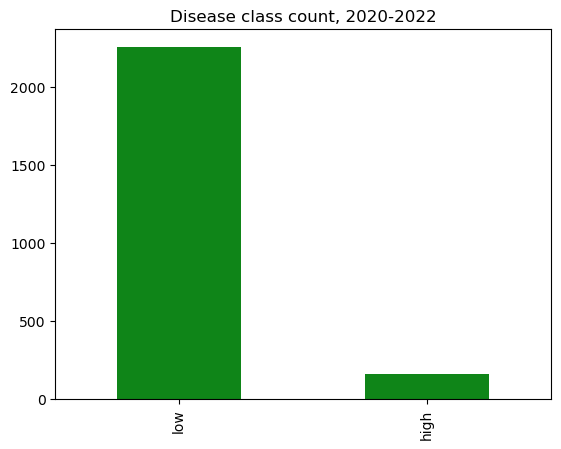

In [69]:
# Visualize data imbalance

target_count = master_df.disease_class.value_counts()
print('Low disease:', target_count[0])
print('High disease:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Disease class count, 2020-2022');

Low disease: 1074
High disease: 121
Proportion: 8.88 : 1


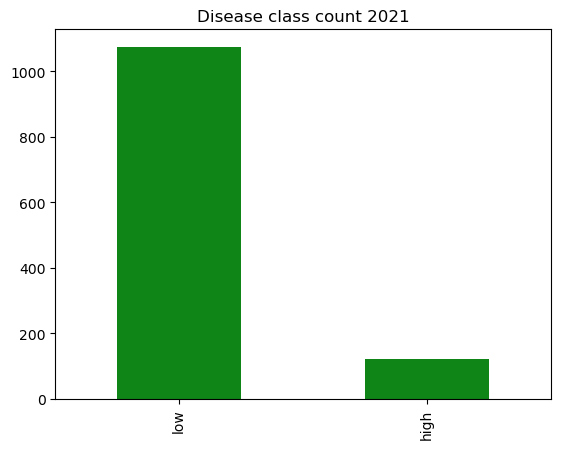

In [70]:
# For each year
target_count = dfs[1].disease_class.value_counts()
print('Low disease:', target_count[0])
print('High disease:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
    
target_count.plot(kind='bar', title='Disease class count 2021');

In [30]:
# Plot high vs low counts per day all years

# colors = ["#0F8518", "#FFFFFF"]
# sns.set_palette(colors)
# sns.boxplot(data=dfs[0], x='Date', y='arvi', hue='disease_class',showfliers=False)
# plt.ylabel('ARVI')
# plt.legend(title='Disease Severity')

In [85]:
print('High disease EVI:', master_df[master_df['disease_class']=='high'].evi.mean())
print('Low disease EVI:', master_df[master_df['disease_class']=='low'].evi.mean())

print('Low disease SAVI:', master_df[master_df['disease_class']=='low'].savi.mean())
print('High disease SAVI:', master_df[master_df['disease_class']=='high'].savi.mean())

print('Low disease ARVI:', master_df[master_df['disease_class']=='low'].arvi.mean())
print('High disease ARVI:', master_df[master_df['disease_class']=='high'].arvi.mean())

print('Low disease GRI:', master_df[master_df['disease_class']=='low'].gri.mean())
print('High disease GRI:', master_df[master_df['disease_class']=='high'].gri.mean())

High disease EVI: 0.45086111605627904
Low disease EVI: 0.4694224223978387
Low disease SAVI: 0.4450207034110687
High disease SAVI: 0.43994644270683253
Low disease ARVI: 0.5974407970478798
High disease ARVI: 0.6584283643631413
Low disease GRI: 1.237173084238088
High disease GRI: 1.2929348365866544


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1338/1093362448.py:9: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 220,20)


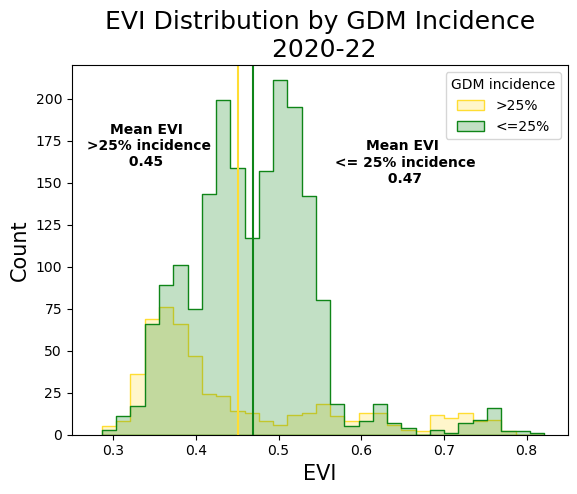

In [87]:
# Plot distributions for 2020-2022 incidence
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=master_df, x="evi", hue="disease_class", element='step')

plt.xlabel('EVI', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xlim(0.25, 0.85)
plt.ylim(0, 220,20)
plt.legend(title='GDM incidence', loc='upper right', labels=['>25%', '<=25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=master_df[master_df['disease_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.34, 160, "Mean EVI\n >25% incidence\n 0.45 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=master_df[master_df['disease_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.65, 150, "Mean EVI\n <= 25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by GDM Incidence\n 2020-22', fontsize=18)
#plt.savefig("fig2_inc_20_22.svg")
plt.show()

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1338/3828744239.py:9: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 220,20)


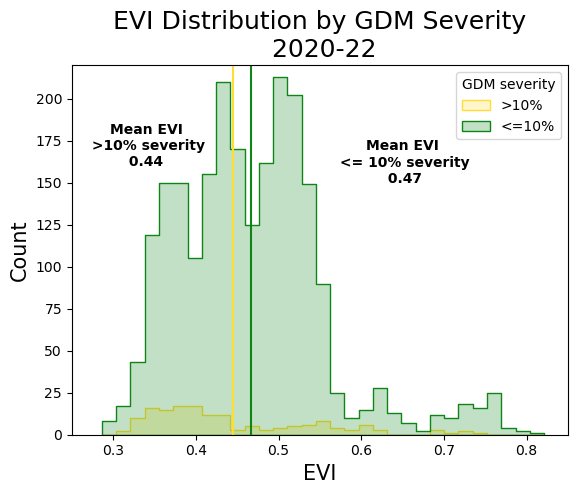

In [78]:
# # Plot distributions for 2020-2022
# colors = ["#0F8518", "#FFDD33"]
# sns.set_palette(colors)
# sns.histplot(data=master_df, x="evi", hue="disease_class", element='step')

# plt.xlabel('EVI', fontsize = 15)
# plt.ylabel('Count', fontsize = 15)
# plt.xlim(0.25, 0.85)
# plt.ylim(0, 220,20)
# plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# # Add lines for mean EVI

# #high disease
# plt.axvline(x=master_df[master_df['disease_class']=='high'].evi.mean(),
#             color="#FFDD33")
# plt.text(0.34, 160, "Mean EVI\n >10% severity\n 0.44 ", horizontalalignment='center', size='medium', color='black', weight='semibold')

# #low disease
# plt.axvline(x=master_df[master_df['disease_class']=='low'].evi.mean(),
#             color="#0F8518")

# plt.text(0.65, 150, "Mean EVI\n <= 10% severity\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
# plt.title('EVI Distribution by GDM Severity\n 2020-22', fontsize=18)
# #plt.savefig("fig2_sev_20_22.svg")
# plt.show()

In [17]:
# Use Mann-whitney U test to check if differences are significant
from scipy import stats
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    return print("Mann-Whitney U:", u_statistic, "p-value:", p_value)

In [18]:
# define distributions (EVI, all years)
dist_1 = low_dis['evi']
dist_2 = high_dis['evi']

In [19]:
mann_whitney_u_test(dist_1, dist_2)

Mann-Whitney U: 642985.5 p-value: 4.283623893884584e-20


In [20]:
# Try with just 2020

#EVI
dist_low_20 = dfs[0][dfs[0]['disease_class']=='low']['evi']
dist_high_20 = dfs[0][dfs[0]['disease_class']=='high']['evi']


print(mann_whitney_u_test(dist_low_20, dist_high_20))
print("Low disease EVI (mean):", dist_low_20.mean())
print("High disease EVI (mean):", dist_high_20.mean())


# SAVI
savi_low_20 = dfs[0][dfs[0]['disease_class']=='low']['savi']
savi_high_20 = dfs[0][dfs[0]['disease_class']=='high']['savi']


print(mann_whitney_u_test(savi_low_20, savi_high_20))
print("Low disease SAVI (mean):", savi_low_20.mean())
print("High disease SAVI (mean):", savi_high_20.mean())

# ARVI
arvi_low_20 = dfs[0][dfs[0]['disease_class']=='low']['arvi']
arvi_high_20 = dfs[0][dfs[0]['disease_class']=='high']['arvi']


print(mann_whitney_u_test(arvi_low_20, arvi_high_20))
print("Low disease ARVI (mean):", arvi_low_20.mean())
print("High disease ARVI (mean):", arvi_high_20.mean())

# GRI
gri_low_20 = dfs[0][dfs[0]['disease_class']=='low']['gri']
gri_high_20 = dfs[0][dfs[0]['disease_class']=='high']['gri']


print(mann_whitney_u_test(gri_low_20, gri_high_20))
print("Low disease GRI (mean):", gri_low_20.mean())
print("High disease GRI (mean):", gri_high_20.mean())

Mann-Whitney U: 6544.5 p-value: 2.5206614510950456e-31
None
Low disease EVI (mean): 0.5150578424010114
High disease EVI (mean): 0.6555709932902264
Mann-Whitney U: 7142.5 p-value: 3.850585336881239e-29
None
Low disease SAVI (mean): 0.45812370626860777
High disease SAVI (mean): 0.5495017328735006
Mann-Whitney U: 7472.5 p-value: 5.695327254798912e-28
None
Low disease ARVI (mean): 0.6726209230340658
High disease ARVI (mean): 0.8052477004403714
Mann-Whitney U: 7503.5 p-value: 7.313746663618575e-28
None
Low disease GRI (mean): 1.3115972185860263
High disease GRI (mean): 1.5741430647824286


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_2904/172015020.py:10: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 160,20)


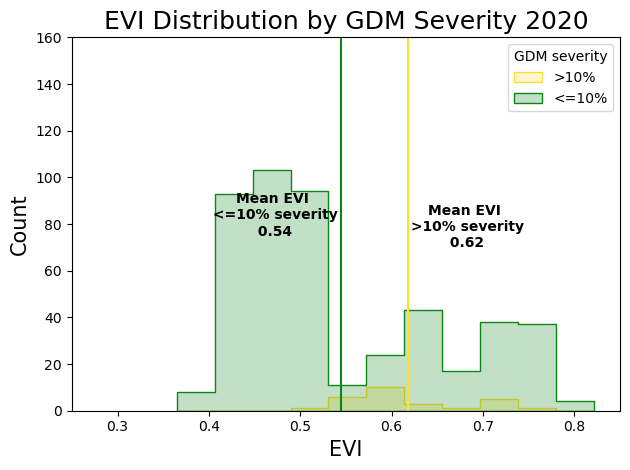

In [98]:
# # Plot the 2020 EVI distribution

# colors = ["#0F8518", "#FFDD33"]
# sns.set_palette(colors)
# sns.histplot(data=dfs[0], x="evi", hue="disease_class", element='step')

# plt.xlabel('EVI', fontsize=15)
# plt.ylabel('Count', fontsize=15)
# plt.xlim(0.25, 0.85)
# plt.ylim(0, 160,20)
# plt.legend(title='GDM severity', loc='upper right', labels=['>10%', '<=10%'])

# # Add lines for mean EVI

# #high disease
# plt.axvline(x=dfs[0][dfs[0]['disease_class']=='high'].evi.mean(),
#             color="#FFDD33")
# plt.text(0.68, 70, "Mean EVI\n >10% severity\n 0.62", horizontalalignment='center', size='medium', color='black', weight='semibold')

# #low disease
# plt.axvline(x=dfs[0][dfs[0]['disease_class']=='low'].evi.mean(),
#             color="#0F8518")

# plt.text(0.47, 75, "Mean EVI\n <=10% severity\n 0.54", horizontalalignment='center', size='medium', color='black', weight='semibold')
# plt.title('EVI Distribution by GDM Severity 2020', fontsize=18)
# plt.tight_layout()
# #plt.savefig("fig2_sev_2020.svg")
# plt.show()

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1338/2356525501.py:10: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 160,20)


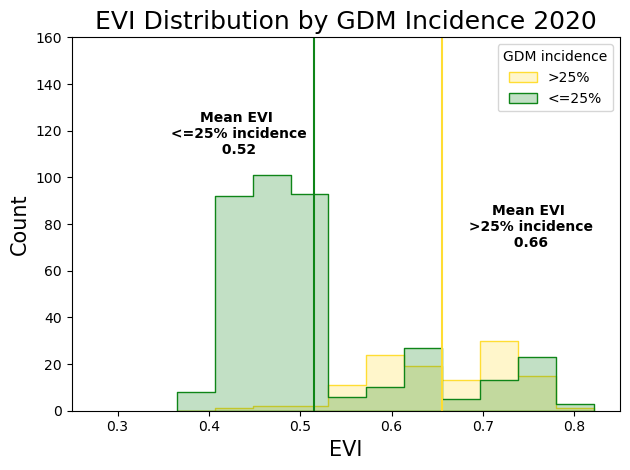

In [56]:
# Plot the 2020 EVI distribution by incidence

colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=dfs[0], x="evi", hue="disease_class", element='step')

plt.xlabel('EVI', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlim(0.25, 0.85)
plt.ylim(0, 160,20)
plt.legend(title='GDM incidence', loc='upper right', labels=['>25%', '<=25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=dfs[0][dfs[0]['disease_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.75, 70, "Mean EVI\n >25% incidence\n 0.66", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=dfs[0][dfs[0]['disease_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.43, 110, "Mean EVI\n <=25% incidence\n 0.52", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by GDM Incidence 2020', fontsize=18)
plt.tight_layout()
#plt.savefig("fig2_inc_2020.svg")
plt.show()

In [25]:
# Try with just 2021
dist_low_21 = dfs[1][dfs[1]['disease_class']=='low']['evi']
len(dist_low_21)
dist_high_21 = dfs[1][dfs[1]['disease_class']=='high']['evi']
len(dist_high_21)

print(mann_whitney_u_test(dist_low_21, dist_high_21))

print("Low disease EVI (mean) 2021:", dist_low_21.mean())
print("High disease EVI (mean) 2021:", dist_high_21.mean())

# SAVI
savi_low_21 = dfs[1][dfs[1]['disease_class']=='low']['savi']
savi_high_21 = dfs[1][dfs[1]['disease_class']=='high']['savi']


print(mann_whitney_u_test(savi_low_21, savi_high_21))
print("Low disease SAVI (mean):", savi_low_21.mean())
print("High disease SAVI (mean):", savi_high_21.mean())

# ARVI
arvi_low_21 = dfs[1][dfs[1]['disease_class']=='low']['arvi']
arvi_high_21 = dfs[1][dfs[1]['disease_class']=='high']['arvi']


print(mann_whitney_u_test(arvi_low_21, arvi_high_21))
print("Low disease ARVI (mean):", arvi_low_21.mean())
print("High disease ARVI (mean):", arvi_high_21.mean())

# GRI
gri_low_21 = dfs[1][dfs[1]['disease_class']=='low']['gri']
gri_high_21 = dfs[1][dfs[1]['disease_class']=='high']['gri']


print(mann_whitney_u_test(gri_low_21, gri_high_21))
print("Low disease GRI (mean):", gri_low_21.mean())
print("High disease GRI (mean):", gri_high_21.mean())

Mann-Whitney U: 256929.0 p-value: 2.0973978138453817e-66
None
Low disease EVI (mean) 2021: 0.4687804493201137
High disease EVI (mean) 2021: 0.3890013186333973
Mann-Whitney U: 251965.0 p-value: 5.648082127314489e-60
None
Low disease SAVI (mean): 0.45174454201983405
High disease SAVI (mean): 0.4059004724153702
Mann-Whitney U: 215342.0 p-value: 7.222269013829611e-23
None
Low disease ARVI (mean): 0.6615290220234684
High disease ARVI (mean): 0.623844283752368
Mann-Whitney U: 260949.0 p-value: 7.394017276013121e-72
None
Low disease GRI (mean): 1.462277428088084
High disease GRI (mean): 1.2329926873002341


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1338/1461670007.py:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 160,20)


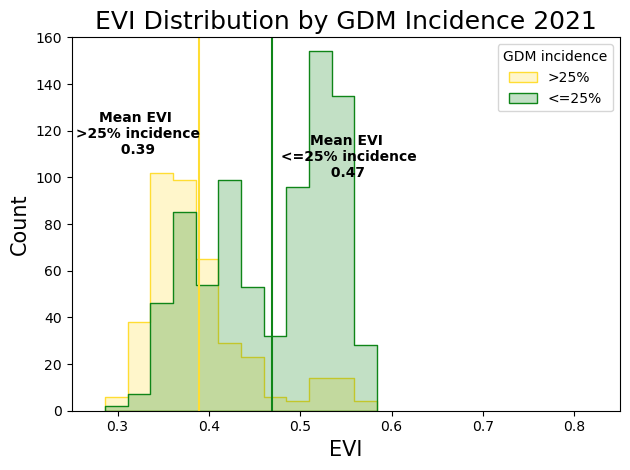

In [55]:
# Plot the 2021 EVI distribution


colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=dfs[1], x="evi", hue="disease_class", element='step')

plt.xlabel('EVI', fontsize = 15)
plt.ylabel('Count', fontsize=15)
plt.xlim(0.25, 0.85)
plt.ylim(0, 160,20)
plt.legend(title='GDM incidence', loc='upper right', labels=['>25%', '<=25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=dfs[1][dfs[1]['disease_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.32, 110, "Mean EVI\n >25% incidence\n 0.39", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=dfs[1][dfs[1]['disease_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.55, 100, "Mean EVI\n <=25% incidence\n 0.47", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by GDM Incidence 2021', fontsize=18)
plt.tight_layout()
#plt.savefig("fig2_inc_2021.svg")
plt.show()

In [29]:
# Try with just 2022
dist_low_22 = dfs[2][dfs[2]['disease_class']=='low']['evi']
len(dist_low_22)
dist_high_22 = dfs[2][dfs[2]['disease_class']=='high']['evi']
len(dist_high_22)

print(mann_whitney_u_test(dist_low_22, dist_high_22))

print("Low disease EVI (mean) 2022:", dist_low_22.mean())
print("High disease EVI (mean) 2022:", dist_high_22.mean())

# SAVI
savi_low_22 = dfs[2][dfs[2]['disease_class']=='low']['savi']
savi_high_22 = dfs[2][dfs[2]['disease_class']=='high']['savi']


print(mann_whitney_u_test(savi_low_22, savi_high_22))
print("Low disease SAVI (mean):", savi_low_22.mean())
print("High disease SAVI (mean):", savi_high_22.mean())

# ARVI
arvi_low_22 = dfs[2][dfs[2]['disease_class']=='low']['arvi']
arvi_high_22 = dfs[2][dfs[2]['disease_class']=='high']['arvi']


print(mann_whitney_u_test(arvi_low_22, arvi_high_22))
print("Low disease ARVI (mean):", arvi_low_22.mean())
print("High disease ARVI (mean):", arvi_high_22.mean())

# GRI
gri_low_22 = dfs[2][dfs[2]['disease_class']=='low']['gri']
gri_high_22 = dfs[2][dfs[2]['disease_class']=='high']['gri']


print(mann_whitney_u_test(gri_low_22, gri_high_22))
print("Low disease GRI (mean):", gri_low_22.mean())
print("High disease GRI (mean):", gri_high_22.mean())

Mann-Whitney U: 5405.0 p-value: 0.0005140581606930029
None
Low disease EVI (mean) 2022: 0.445100672661919
High disease EVI (mean) 2022: 0.48299929471929626
Mann-Whitney U: 5077.0 p-value: 0.00015165938292209283
None
Low disease SAVI (mean): 0.4301636422752533
High disease SAVI (mean): 0.4717559718639093
Mann-Whitney U: 6294.0 p-value: 0.008805419771008148
None
Low disease ARVI (mean): 0.4831217567648432
High disease ARVI (mean): 0.5294778608877274
Mann-Whitney U: 8117.0 p-value: 0.3850163508133293
None
Low disease GRI (mean): 0.9397478231834608
High disease GRI (mean): 0.9480908898409834


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1338/4194862775.py:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 160,20)


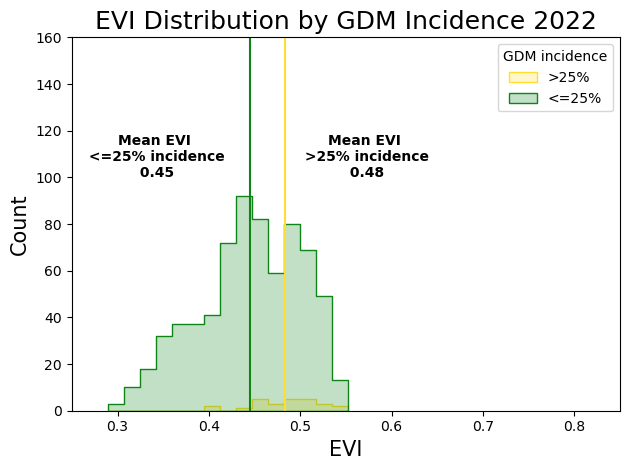

In [54]:
# Plot the 2022 EVI distribution


colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=dfs[2], x="evi", hue="disease_class", element='step')

plt.xlabel('EVI', fontsize =15)
plt.ylabel('Count', fontsize =15)
plt.xlim(0.25, 0.85)
plt.ylim(0, 160,20)
plt.legend(title='GDM incidence', loc='upper right', labels=['>25%', '<=25%'])

# Add lines for mean EVI

#high disease
plt.axvline(x=dfs[2][dfs[2]['disease_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.57, 100, "Mean EVI\n >25% incidence\n 0.48", horizontalalignment='center', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=dfs[2][dfs[2]['disease_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.34, 100, "Mean EVI\n <=25% incidence\n 0.45", horizontalalignment='center', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by GDM Incidence 2022', fontsize=18)
plt.tight_layout()
#plt.savefig("fig2_inc_2022.svg")
plt.show()

In [24]:
# Try limiting dataset to JUST DM block

just_DM = master_df[master_df['Block']=='DM']
just_DM_20 = dfs[0][dfs[0]['Block']=='DM']
just_DM_21 = dfs[1][dfs[1]['Block']=='DM']

In [25]:
just_DM_20.Block.unique()

array(['DM'], dtype=object)

In [26]:
# Test for sig. diff in EVI for 2020

dm_low_20 = just_DM_20[just_DM_20['disease_class']=='low']['evi']
len(dm_low_20)
dm_high_20 = just_DM_20[just_DM_20['disease_class']=='high']['evi']
len(dm_high_20)

print(mann_whitney_u_test(dm_low_20, dm_high_20))
print("Low disease EVI (mean):", dm_low_20.mean())
print("High disease EVI (mean):", dm_high_20.mean())

Mann-Whitney U: 247.0 p-value: 0.08833241964717731
None
Low disease EVI (mean): 0.5560916113243539
High disease EVI (mean): 0.664622585755704


In [27]:
# For 2021

dm_low_21 = just_DM_21[just_DM_21['disease_class']=='low']['evi']
len(dm_low_21)
dm_high_21 = just_DM_21[just_DM_21['disease_class']=='high']['evi']
len(dm_high_21)

print(mann_whitney_u_test(dm_low_21, dm_high_21))
print("Low disease EVI (mean):", dm_low_21.mean())
print("High disease EVI (mean):", dm_high_21.mean())

Mann-Whitney U: 24396.0 p-value: 3.8280110533687407e-13
None
Low disease EVI (mean): 0.46048877360592066
High disease EVI (mean): 0.4026880372836026


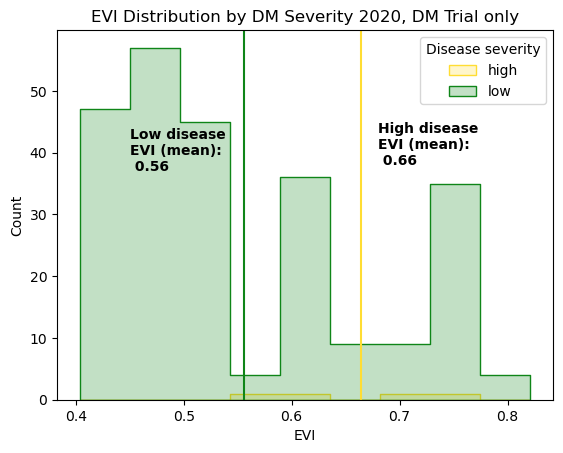

In [28]:
# DM trial only, 2020
# Plot the 2020 EVI distribution

colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=just_DM_20, x="evi", hue="disease_class", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease severity', loc='upper right', labels=['high', 'low'])

# Add lines for mean EVI

#high disease
plt.axvline(x=just_DM_20[just_DM_20['disease_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.68, 38, "High disease \nEVI (mean):\n 0.66", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=just_DM_20[just_DM_20['disease_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.45, 37, "Low disease \nEVI (mean):\n 0.56", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Severity 2020, DM Trial only')
#plt.savefig("evi_hist_2020_DM.png")
plt.show()

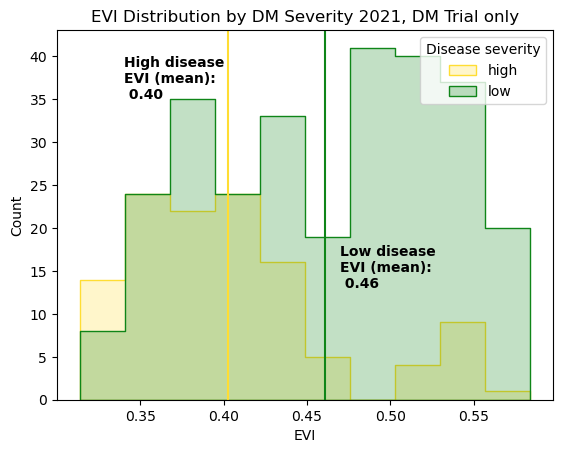

In [29]:
# DM trial only, 2021
# Plot the 2021 EVI distribution

colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=just_DM_21, x="evi", hue="disease_class", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease severity', loc='upper right', labels=['high', 'low'])

# Add lines for mean EVI

#high disease
plt.axvline(x=just_DM_21[just_DM_21['disease_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.34, 35, "High disease \nEVI (mean):\n 0.40", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=just_DM_21[just_DM_21['disease_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.47, 13, "Low disease \nEVI (mean):\n 0.46", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Severity 2021, DM Trial only')
#plt.savefig("evi_hist_2021_DM.png")
plt.show()

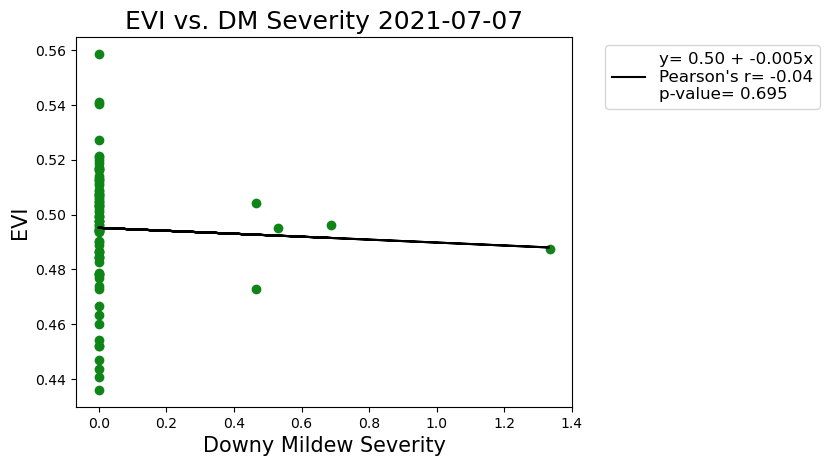

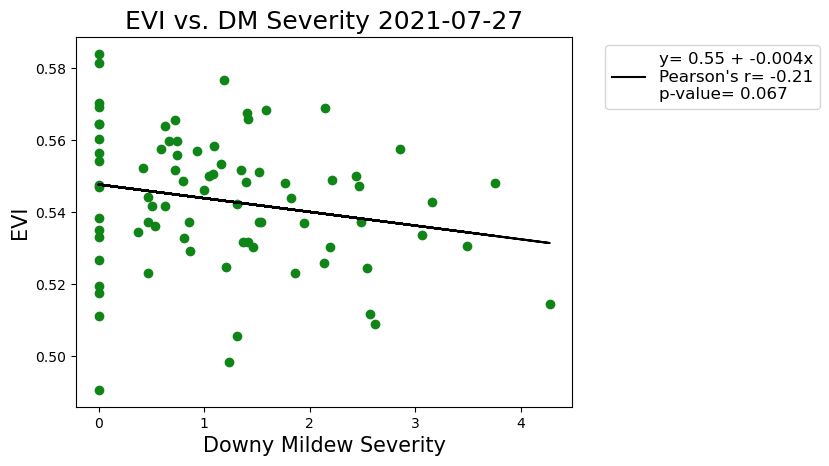

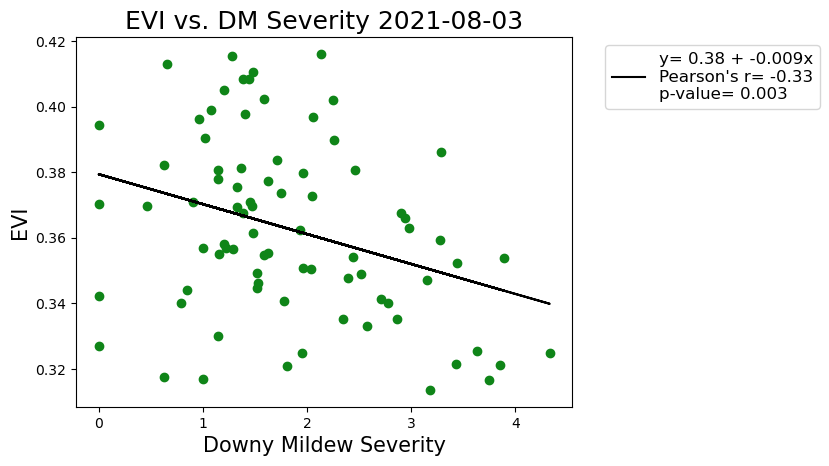

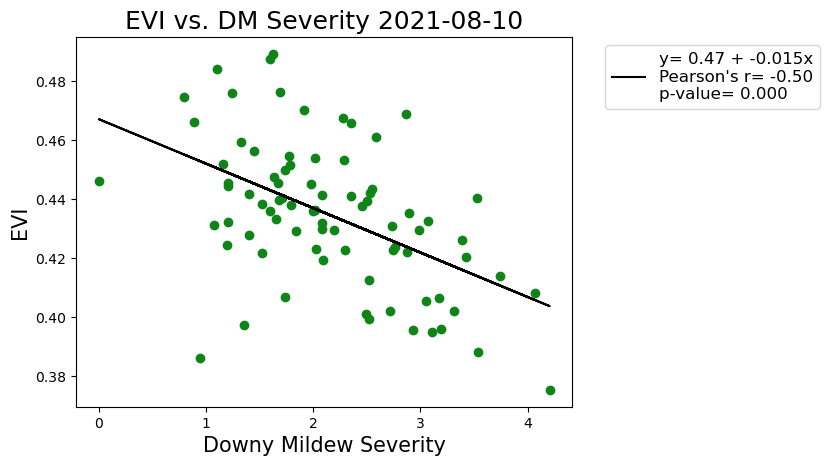

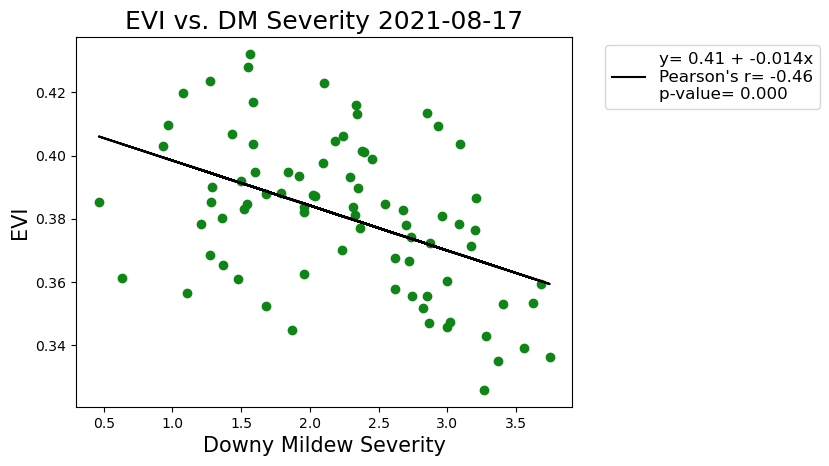

In [30]:
# Daily scatter plots 2021

dates_2021 = just_DM_21.Date.unique()

daily_data = []

for d in dates_2021:
    daily = just_DM_21[just_DM_21['Date']==d]
    daily_data.append(daily)
#EVI     
for df in daily_data:
    x_var = np.cbrt(df['DM_severity']) # cubic root transform to get more normal distribution
    y_var = df['evi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
    sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
    line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
    
    fig, ax = plt.subplots()
    ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#0F8518")
    ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
    ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
    ax.set_ylabel("EVI", fontsize = 15)
    ax.set_title(f"EVI vs. DM Severity {str(df['Date'].unique())[2:-2]}", fontsize = 18)
    ax.legend(facecolor='white')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
    plt.show()

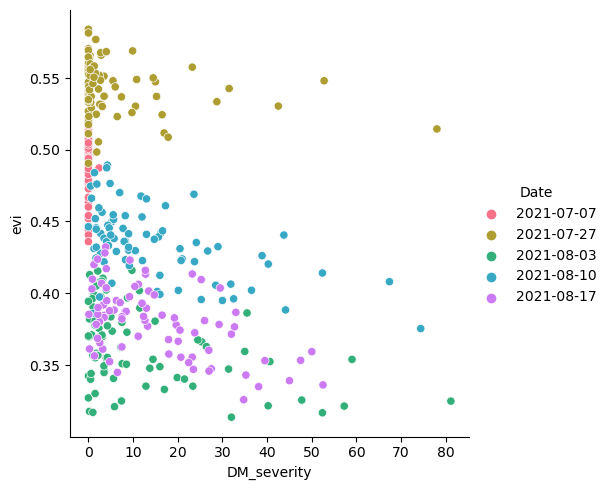

In [31]:
sns.relplot(data=just_DM_21, x="DM_severity", y="evi", hue="Date")

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1115/1022224775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_DM_21['DM_sev_cbrt'] = np.cbrt(just_DM_21['DM_severity'])


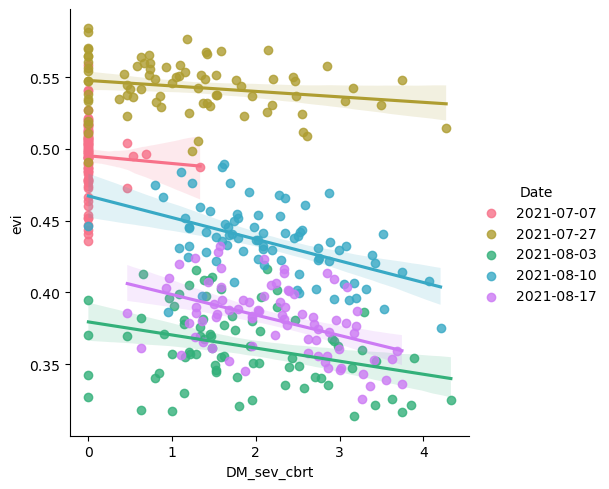

In [32]:
just_DM_21['DM_sev_cbrt'] = np.cbrt(just_DM_21['DM_severity'])
sns.lmplot(x='DM_sev_cbrt', y="evi", hue="Date", data=just_DM_21)

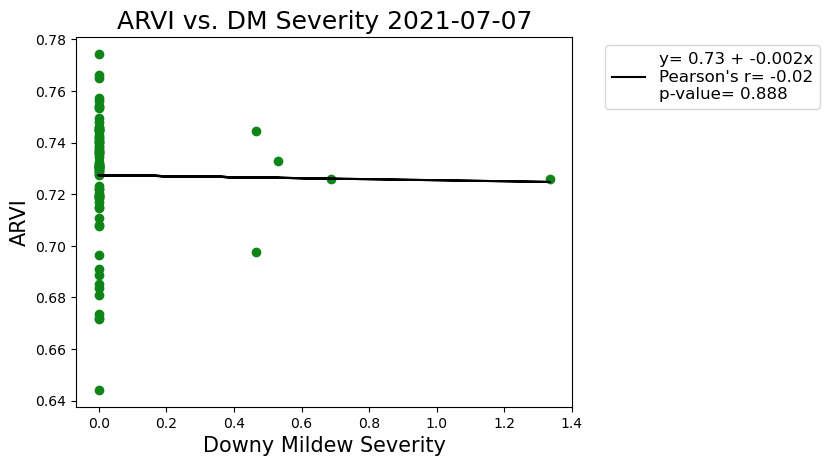

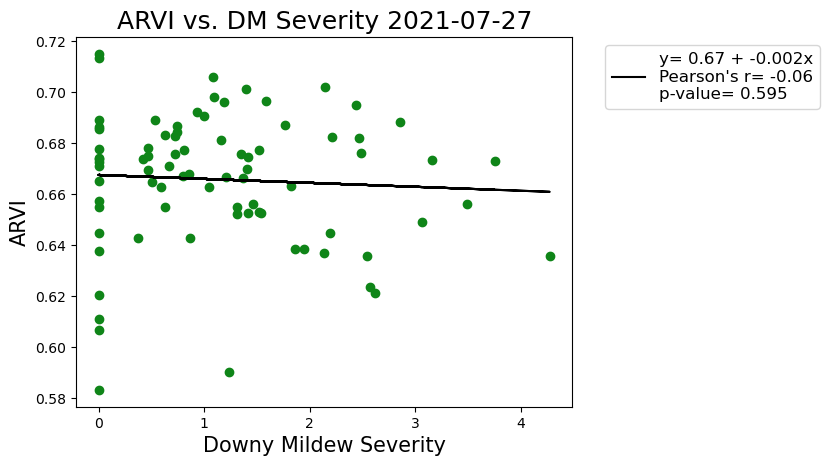

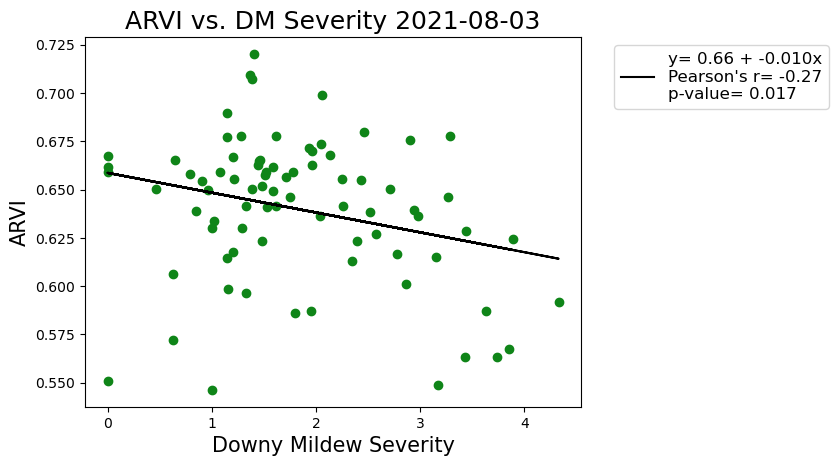

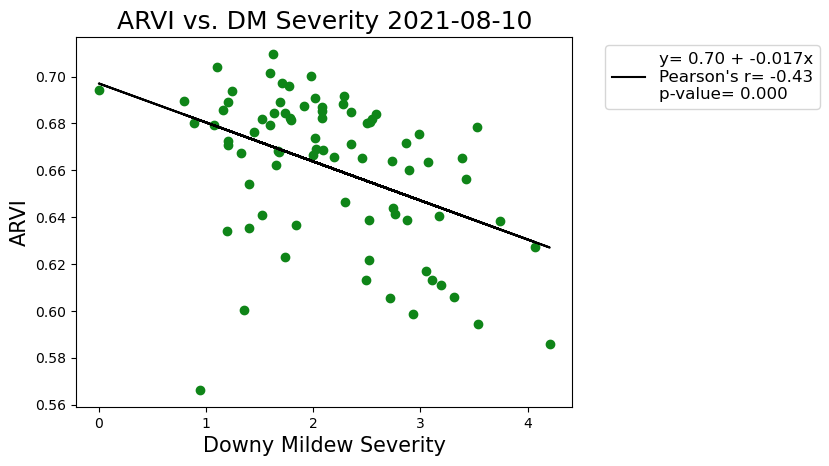

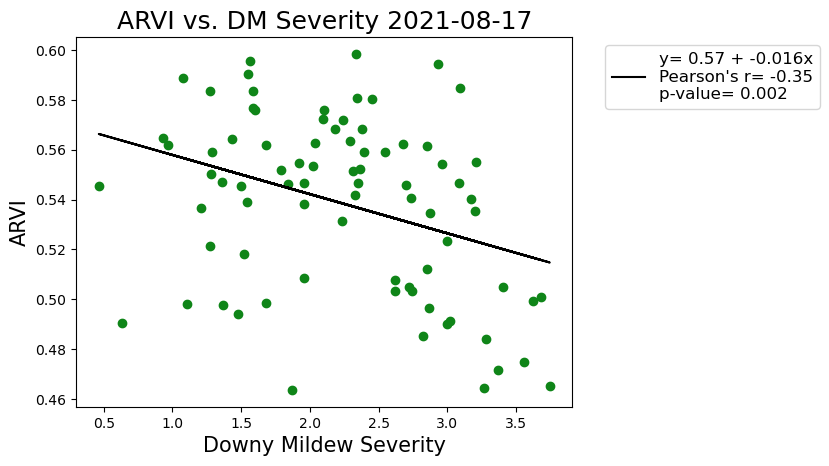

In [33]:
# Daily scatter plots 2021

dates_2021 = just_DM_21.Date.unique()

daily_data = []

for d in dates_2021:
    daily = just_DM_21[just_DM_21['Date']==d]
    daily_data.append(daily)
#EVI     
for df in daily_data:
    x_var = np.cbrt(df['DM_severity']) # cubic root transform to get more normal distribution
    y_var = df['arvi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
    sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
    line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
    
    fig, ax = plt.subplots()
    ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#0F8518")
    ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
    ax.set_xlabel("Downy Mildew Severity", fontsize = 15)
    ax.set_ylabel("ARVI", fontsize = 15)
    ax.set_title(f"ARVI vs. DM Severity {str(df['Date'].unique())[2:-2]}", fontsize = 18)
    ax.legend(facecolor='white')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
    plt.show()